# Clustering
A small notebook for doing some data exploration and clustering on some dummy data to check the implementation of our functions work as expected.

In [15]:
from math import sqrt

import numpy as np
import matplotlib.pyplot as plt
from tqdm import trange

from kmeans import KMeans
from helpers import calculate_average_radius, scatter, davies_bouldin_score
from dbscan import dbscan

## Plot some sample data

/zhome/c9/c/156514/wiki-suggest/text-processing/utils.py:53: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(points[:,0], points[:,1], c=colors, cmap="Set1")


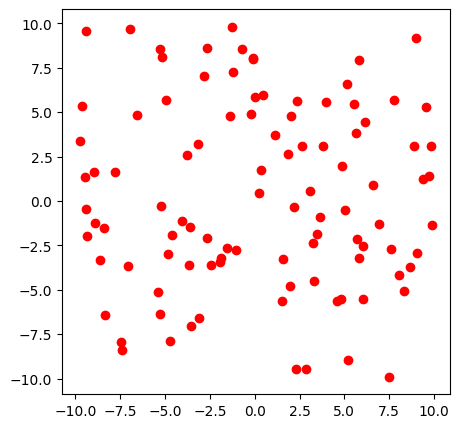

In [2]:
N = 100
points = np.random.uniform(-10, 10, (N, 2))

scatter(points)

### Select K based on average radius

In [6]:
K = 25

radius_scores = []
davies_scores = []

for k in trange(2, K + 1):
    kmeans = KMeans(n_clusters = k, n_iterations = 10)
    labels, centroids = kmeans.cluster(points)
    
    # We return the mean of the average radius per cluster - maybe it should be a mean or something else idk
    radius_scores.append(calculate_average_radius(points, labels, centroids).mean())
    davies_scores.append(davies_bouldin_score(points, labels, centroids))


100%|██████████| 24/24 [00:00<00:00, 40.90it/s]


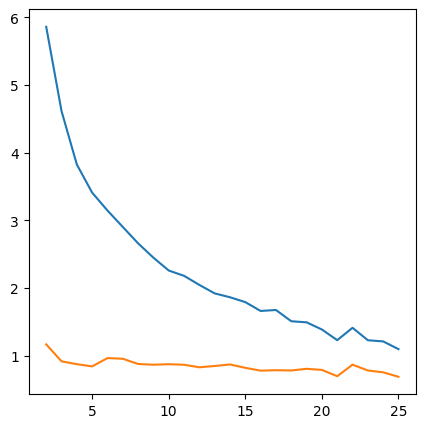

In [7]:
# Note davies-score sucks, or at least doesnt changes the the number of clusters
plt.figure(figsize=(5,5))
plt.plot(range(2, K + 1), radius_scores)
plt.plot(range(2, K + 1), davies_scores)
plt.show()

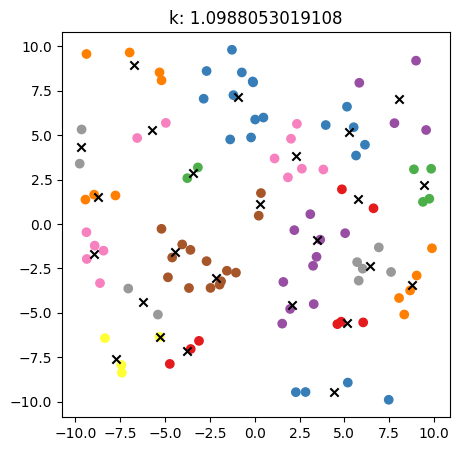

In [13]:
# Plot the last clustering for fun
scatter(points, centroids, labels, f"k: {radius_scores[-1]}")    

# DBSCAN algorithm

In [18]:
labels = dbscan(points.tolist(), eps = 2, min_neighbours = 3, dist_function = "eucliean")

{1, 2, 3, 4, 5, 6, 7, -1}


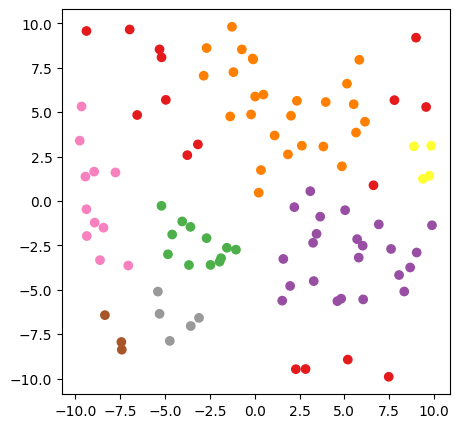

In [19]:
print(set(labels))
scatter(points, colors=labels)